# Linear Regression
- [Error Metric](#error)
- [Residuals](#residuals)
- [Coefficients](#coefficients)
- [Implement. w/o sklearn](#explain)

### Quick maths:
Minimize the __empirical risk__ (average loss)
$$\mathcal{E} (\mathbf{w}) = \frac{1}{N}\sum^{N}_{i=1}(y^{(i)} - \mathbf{w}^{T} \mathbf{x}^{(i)})^2.
$$

Our goal is to find the optimal weights such that
\begin{align}
\mathbf{w}_{\rm opt} &= \underset{ \mathbf{w} \in \ \mathbb{R}^{2}}{\operatorname{argmin}} \{ \frac{1}{N}\sum^{N}_{i=1}(y^{(i)} - \mathbf{w}^{T} \mathbf{x}^{(i)})^2 \}\\
&= \underset{ \mathbf{w} \in \ \mathbb{R}^{2}}{\operatorname{argmin}} \frac{1}{N} {||\mathbf{y}-\mathbf{X}\mathbf{w}||}_2^2,
\end{align}

where
$$
\mathbf{X} = \big(\mathbf{x}^{(1)},\ldots,\mathbf{x}^{(N)}\big)^{T} \text{and }\mathbf{y} = \begin{bmatrix}y^{(1)}\\\vdots\\y^{(n)}\end{bmatrix}\ 
$$

($x^{(i)}$ is each feature column)

Whenever the matrix $\mathbf{X}^T \mathbf{X}$ is invertible,
the optimal weight which minimizes the empirical risk, is obtained as 
$$
\mathbf{w}_{\rm opt} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}$$


```
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)

lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
customers = pd.read_csv("./data/Ecommerce Customers")
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


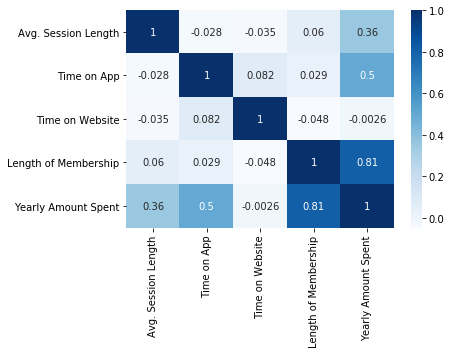

In [4]:
sns.heatmap(customers.corr(), annot=True, cmap='Blues')

In [5]:
# try to predict Yearly Amount Spent
df = customers[customers.describe().columns]
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
to_predict = 'Yearly Amount Spent'
y = df[to_predict]
X = df.loc[:, df.columns != to_predict]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)

In [8]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

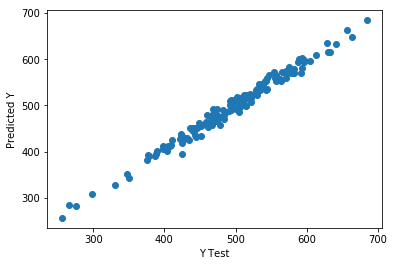

In [9]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

<a id='error'></a>
### Error Metric

Mean Squared Error = $\frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2$

Mean Absolute Error = $\frac{1}{n} \sum_{i=1}^n |Y_i - \hat{Y}_i|$

In [10]:
def error_metric(y_test, predictions):
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('r2 score:', metrics.r2_score(y_test, predictions))
    
error_metric(y_test, predictions)

MAE: 8.151197410014507
MSE: 96.95864243798843
RMSE: 9.846757965847868
r2 score: 0.9835559244225895


<a id='residuals'></a>
### Residuals

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

/home/adam/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/adam/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


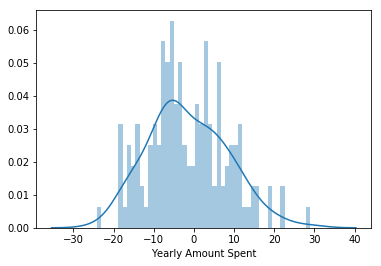

In [11]:
sns.distplot((y_test-predictions),bins=50);

<a id='coefficients'></a>
### Coefficients

In [12]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.469921
Time on App,38.598116
Time on Website,0.472040
Length of Membership,61.348210


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

In [13]:
lm.intercept_

-1041.5651691014293

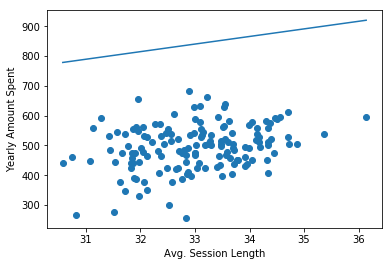

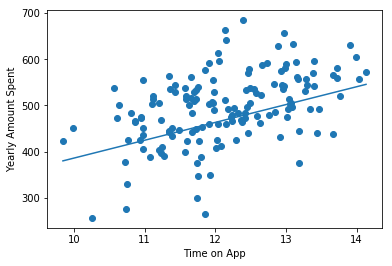

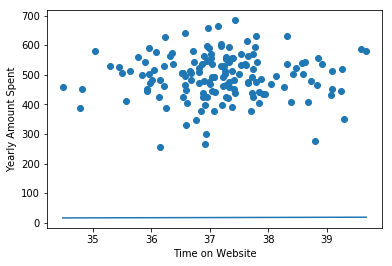

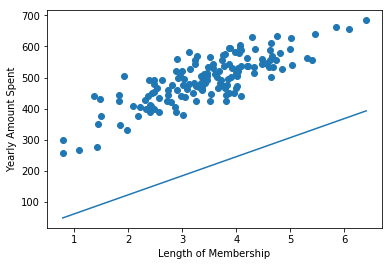

In [14]:
for i, feature in enumerate(X_test.columns):
    col = X_test[feature]
    plt.scatter(col, y_test)
    plt.xlabel(feature)
    plt.ylabel('Yearly Amount Spent')
    
    guide = np.linspace(col.min(), col.max())
    plt.plot(guide, guide*lm.coef_[i])
    
    plt.show()

<a id='explain'></a>
### Without `sklearn`
Whenever the matrix $\mathbf{X}^T \mathbf{X}$ is invertible,
the optimal weight which minimizes the empirical risk, is obtained as 
$$
\mathbf{w}_{\rm opt} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}$$

In [15]:
def optimal_weight(x, y):
    x, y = np.array(x), np.array(y)
    return np.linalg.inv(x.transpose()@x) @x.transpose()@y
    
optimal_weight(X_train, y_train)

array([ 11.41298291,  35.03702345, -13.89220211,  60.84474251])

In [16]:
# add an intercept coefficient
X_train['i'] = 1
w_opt = optimal_weight(X_train, y_train)
for i, coef in enumerate(w_opt):
    print(f'{X_train.columns[i]}: {coef}')

Avg. Session Length: 25.469921227949847
Time on App: 38.59811591491106
Time on Website: 0.4720404032610075
Length of Membership: 61.348210379364204
i: -1041.5651691016615


/home/adam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
